# Carga de datos


## Pandas

1. `DataFrames` y  `Series`
2. Operaciones básicas

`pandas` es una librería que proporciona herramientas analíticas y estructuras de datos con alto rendimiento y facilidad de uso. En particular, la clase `DataFrame` es útil para representación y manipulación de datos heterogéneos tabulados (hojas de cálculo, tabla SQL, etc.)   



Para importar los módulos de la librería `pandas`, por convención se utiliza:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import drive
drive.mount('/content/drive/')

%matplotlib inline

Mounted at /content/drive/



### Lectura
La librería `pandas` nos permite leer/escribir datos en una amplia variedad de formatos, como: CSV, JSON, HDF5, HTML, etc.

Métodos como `read_csv()`, `read_table()` permiten cargar ficheros de datos en formato tabular de forma local o remota.

Por ejemplo:

In [2]:
path = '/content/drive/MyDrive/1_ IA UCEMA/1erSem 2023/data/Clase EDA'

df = pd.read_csv(path+'/housing_price.csv')
df.head()



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Operaciones con columnas

Se pueden consultar el nombre de las variables usando el atributo columns:

In [3]:
df.columns # tipo atributo

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Se pueden extraer columnas de un DataFrame con la etiqueta de la columna (sólo si es un identificador Python válido) usando notación tipo diccionario o como atributo del objeto. En ambos casos se obtiene un objeto tipo Series.

In [4]:
df["SalePrice"].head()  # tipo diccionario

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [5]:
df.SalePrice.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

#### Indexado y filtrado

pandas soporta varios tipos de indexado:

* Basado en etiquetas, usando `.loc`
* Basado en posiciones, usando `.iloc`
* Mixto, usando `.ix`

Para acceder a las filas, se puede usar el atributo ix o la función iloc.

In [6]:
print(df.iloc[0])

Id                    1
MSSubClass           60
MSZoning             RL
LotFrontage        65.0
LotArea            8450
                  ...  
MoSold                2
YrSold             2008
SaleType             WD
SaleCondition    Normal
SalePrice        208500
Name: 0, Length: 81, dtype: object


In [7]:
df.loc[df.SalePrice>1000000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


<div class="alert alert-info">**Nota**: Consultar http://pandas.pydata.org/pandas-docs/version/0.19.1/indexing.html#different-choices-for-indexing para ver más información sobre los métodos loc, iloc, ix.</div>

#### Filtrado

Una de las tareas principales cuando se analizan datasets es seleccionar filas usando operadores simples.

In [8]:
df.SalePrice > df.SalePrice.mean()

0        True
1        True
2        True
3       False
4        True
        ...  
1455    False
1456     True
1457     True
1458    False
1459    False
Name: SalePrice, Length: 1460, dtype: bool

In [9]:
df2 = df[df.SalePrice > df.SalePrice.mean()]
df2

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,1448,60,RL,80.0,10000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2007,WD,Normal,240000
1451,1452,20,RL,78.0,9262,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,New,Partial,287090
1454,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,185000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000


Se pueden usar operadores Booleanos para combinar filtros.

In [10]:
df2 = df[(df.SalePrice < df.SalePrice.mean()) & (df.SalePrice >= 100000)]
df2

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000
10,11,20,RL,70.0,11200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,129500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450,1451,90,RL,60.0,9000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,136000
1452,1453,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,145000
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# Análisis Univariante: Técnicas gráficas y numéricas

## Variables cuantitativas

### Tecnicas númericas

1. **Tendencia central de los datos**

    - ***Medias*** o promedios: se basan en operaciones algebraicas y corresponden a la idea de valor medio o centro de gravedad. La más usual es la media aritmética, pero ésta puede ser inadecuada en diferentes situaciones reales. Otros tipos de medias son la media geométrica y la media armónica.
        - Se puede usar para eliminar los extremos
        - Ver si el outlier o valor atípico afecta mucho al valor de la media.

    Los promedios como hemos visto son bastante sensibles a los datos atípicos, para reducir este efecto podemos recurrir a medidas basadas en el lugar que ocupa el valor dentro de la muestra.
    - ***Mediana***: Es el valor central de la muestra una vez ordenada.

    - ***Moda***: Es el valor que más se repite. Proporciona muy poca información y su uso es circunstancial.

2. **Medidas de dispersión**
    Una medida de posición por sí sola es poco informativa si no va asociada a una medida de dispersión.
    El comportamiento de dos muestras puede ser muy diferente aunque su media sea igual. ¿Qué muestra está mejor representada por la media? Una muestra poco dispersa estará mejor representada por una medida de posición que una muy dispersa.

    - ***Rango***: rango=max(x)−min(x)
    - ***Varianza y desviación típica***
        - La varianza está en unidad cuadrática con respecto a la media, mientras que la desviación típica en la misma unidad.
        - Es invariante frente a cambios de origen pero no de escala.
        - Los outliers o valores atípicos pueden tener un efecto excesivo en la varianza o desviación típica.
    - ***Coeficiente de variación***
        - Es el cociente de la desviación típica y la media. Es un coeficiente adimensional que se suele utilizar para comparar muestras con escalas diferentes.
    - ***Rango intercuartílico***
        - Diferencia entre el tercer y primer cuartil, IQR(x)=P75−P25.

3. **Medidas de forma (de distribución)**
    Establecemos coeficientes que nos permitan apreciar algunos aspectos geométricos de la muestra, tales como la ***asimetría*** con respecto a una medida de posición o la concentración alrededor de ésta (***curtosis***).

    - Coeficiente de asimetría de Fisher

Hay diferentes resúmenes ya construidos en Python que podemos utilizar si deseamos.

### Técnicas gráficas

- Histograma
- Box Plot
- Diagrama de líneas. (Para por ejemplo series temporales)

## Variables cualitativas

El tratamiento de las variables cualitativas es diferente al de las cuantitativas ya que al ser sus valores etiquetas no podemos operar algebraicamente con ellas.

##### Tratamiento de variables cualitativas

Esencialmente se trata del manejo de ***tablas de frecuencia***. Consiste en un conteo de la frecuencia con la que aparece cada valor diferente de la muestra.

##### Discretización

Las variables cuantitativas se pueden transformar en cualitativas mediante un proceso de discretización. Obviamente, se pierde información en este proceso.


### Técnicas gráficas

- Diagrama de barras
- Gráficos de puntos
- Gráficos de sectores

## Análisis inicial 

In [11]:
df.shape

(1460, 81)

In [12]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [13]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [14]:
df.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
905,906,20,RL,80.0,9920,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,128000
657,658,70,RL,60.0,7200,Pave,NaN,Reg,HLS,AllPub,...,0,NaN,MnPrv,NaN,0,2,2008,WD,Normal,149000
137,138,90,RL,82.0,11070,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Family,171000
939,940,70,RL,NaN,24090,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,COD,Normal,244400
530,531,80,RL,85.0,10200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,WD,Abnorml,175000


La función describe() da varios valores de estadística del dataframe y excluye los valores NaN.

In [15]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [16]:
df["SalePrice"]

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [17]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

## Variables cuantitativas

**Vamos a ver cómo se distribuye la variable SalePrice.**

El precio de las casas es la variable que queremos estudiar. Para ello, usaremos un histograma.

<ipython-input-18-09aa90332841>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'], bins=100)


<Axes: xlabel='SalePrice', ylabel='Density'>

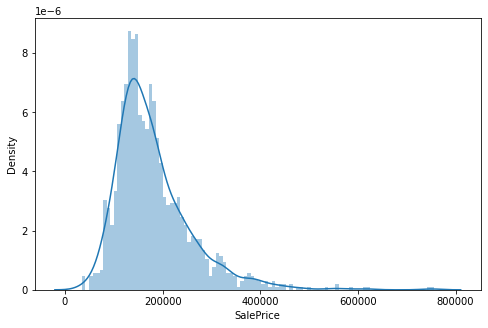

In [18]:
plt.figure(figsize=(8, 5))
sns.distplot(df['SalePrice'], bins=100)

In [19]:
print(df.SalePrice.mean())
print(df.SalePrice.median())
print(df.SalePrice.mode())

180921.19589041095
163000.0
0    140000
Name: SalePrice, dtype: int64


Se puede observar que los precios son asimétricos a la derecha.

<ipython-input-20-17b15e31c798>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log1p(df.SalePrice), color='g', bins=100, hist_kws={'alpha': 0.4});


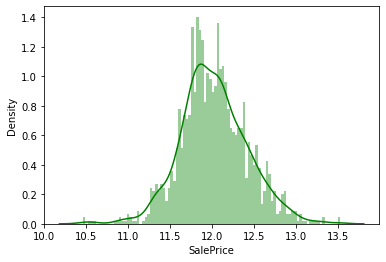

In [20]:
#  y hay algunos outliers en los precios altos.
#Note: Apparently using the log function could also do the job.
sns.distplot(np.log1p(df.SalePrice), color='g', bins=100, hist_kws={'alpha': 0.4});

**Vamos a ver la distribución de las otras variables cuantitativas mediante histogramas.**

Para ello vamos a coger sólo las variables numéricas, y las vamos a representar con histogramas.

Nota: en las variables numéricas pueden haber tanto cuantitativas como cualitativas.

In [21]:
list(set(df.dtypes.tolist()))

[dtype('float64'), dtype('O'), dtype('int64')]

In [22]:
df_numerical = df.select_dtypes(include = ['float64', 'int64'])
df_numerical.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


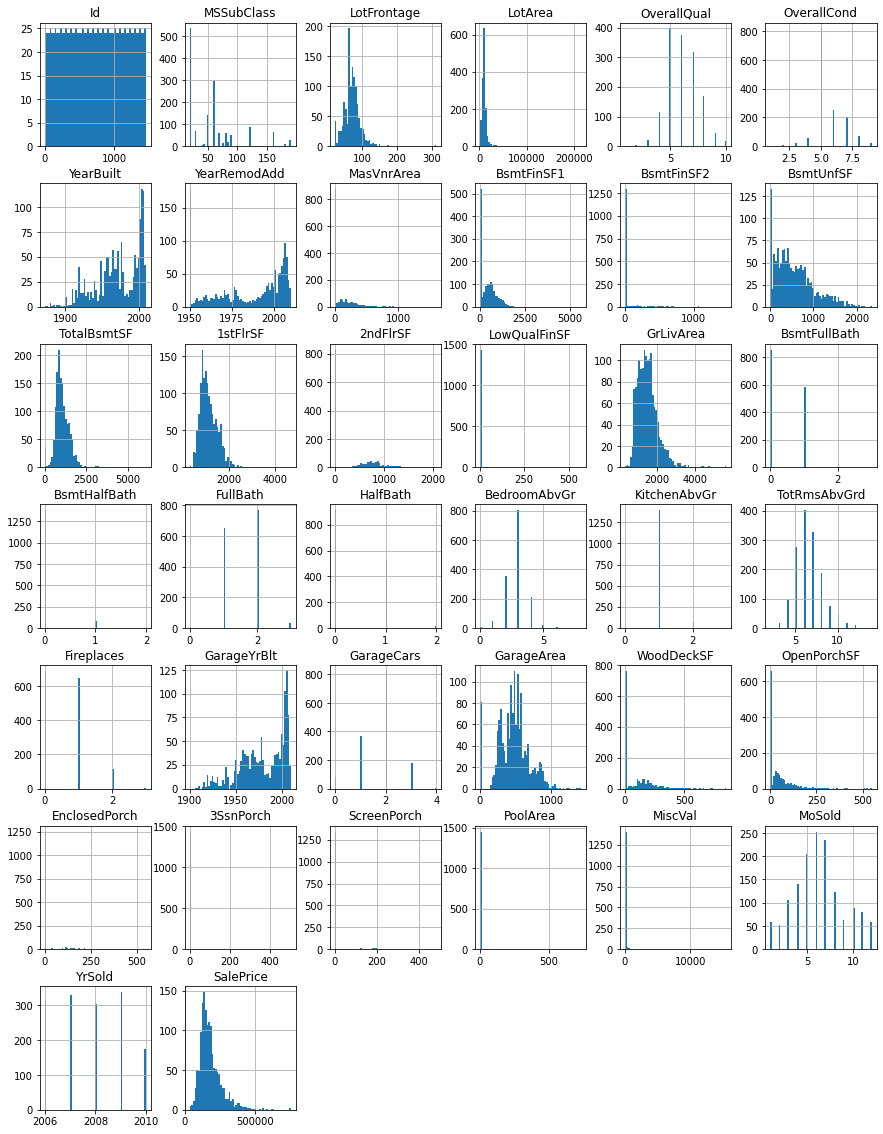

In [23]:
df_numerical.hist(figsize=(15, 20), bins=60, xlabelsize=10, ylabelsize=10);

¿Cuáles creeis que pueden estar correlacionadas con SalePrice?

## Variables cualitativas

Empezamos listando todos los tipos de datos de nuestro dataset, para luego coger sólo las variables no numéricas.

Nota: pueden haber variables numéricas cualitativas, por ejemplo: una variable que representa tener jardín o no:
- 0: no tiene jardin
- 1: tiene jardin pequeño
- 2: tiene jardin grande

**En este ejemplo miraremos variables cualitativas no numéricas. También habría que ver las numéricas, pero para simplificar el ejemplo vemos solo las no numéricas.**

In [24]:
list(set(df.dtypes.tolist()))

[dtype('float64'), dtype('O'), dtype('int64')]

In [25]:
df_categorical = df.select_dtypes(include = ['O'])
df_categorical.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [26]:
df_categorical.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

A estas alturas, exploramos las variables una por una. Para las variables categoricas, usaremos una tabla de frecuencias:

- Para entender la distribución de cada categoría
- También se usa para ver los valores *missing* y los outliers.

También podemos ver el porcentaje de valores en cada categoría. 

También usaremos un *bar chart* para la visualización

Creamos la tabla de frecuencias (crosstabs). La función de Pandas acepta uno o más objetos tipo array como indices o columnas, y después construye un nuevo DataFrame of variable counts basado en los arrays proporcionados.

Vamos a estudiar por ejemplo la variable siguiente

In [27]:
df_categorical["SaleCondition"].unique()

array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],
      dtype=object)

<Axes: xlabel='SaleCondition'>

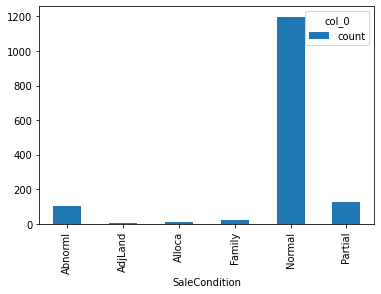

In [28]:
my_table = pd.crosstab(index = df_categorical["SaleCondition"],  # Make a crosstab
                              columns="count")      # Name the count column

my_table.plot.bar()

Como la función crosstab produce Dataframes, las operaciones sobre dataframes funcionan sobre crosstabs.

In [29]:
print(my_table)

print ("\n", my_table.sum(), "\n")   # Sum the counts

col_0          count
SaleCondition       
Abnorml          101
AdjLand            4
Alloca            12
Family            20
Normal          1198
Partial          125

 col_0
count    1460
dtype: int64 



Podemos sacar de la tabla de frecuencias la proporción de datos que pertenece a cada categoría.

In [30]:
my_table/my_table.sum()

col_0,count
SaleCondition,
Abnorml,0.069178
AdjLand,0.002740
Alloca,0.008219
Family,0.013699
Normal,0.820548
Partial,0.085616


# Relación entre variables

Variables Continuas
- Correlación

Variables Continuas y Categóricas

Variables Categóricas
- Visualización por categoría 


## Relación entre Variables Continuas

### Correlación

Vamos a comenzar viendo qué variables cuantitativas están correlacionadas con el precio, para luego ver en un *scatter plot* la relación entre la variable de precio, y la otra variable.

In [31]:
df_numerical.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [32]:
df_numerical_corr = df_numerical.corr()['SalePrice']
df_numerical_most_corr = df_numerical_corr[abs(df_numerical_corr) > 0.5].sort_values(ascending=False)
df_numerical_most_corr

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

In [33]:
df_numerical_most_corr.index

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')

**NOTA**: recordamos que no todas las representadas (numéricas) serán cuantitativas, habrán cualitativas también.

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


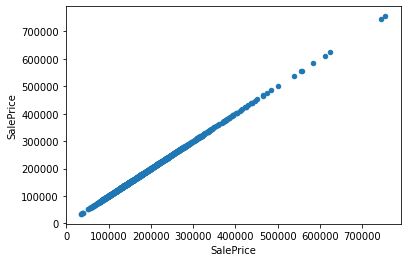

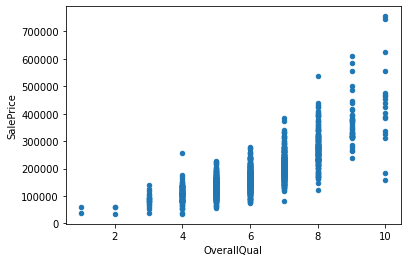

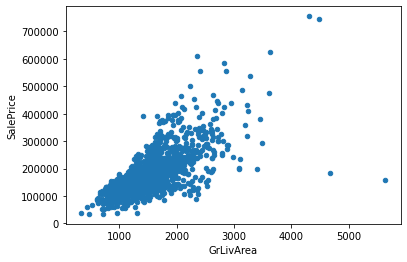

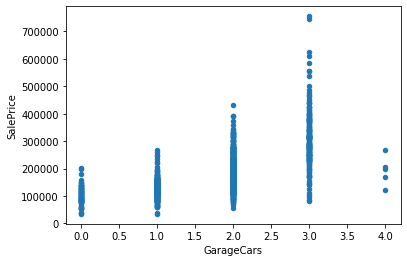

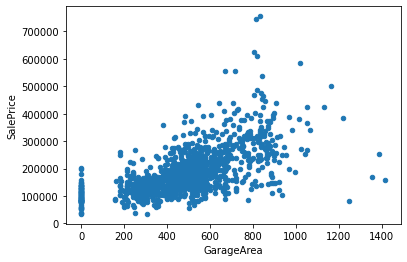

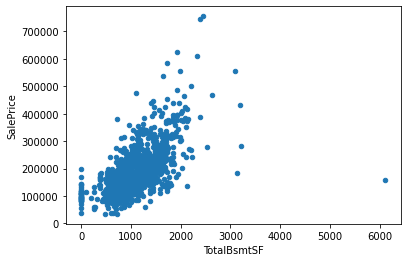

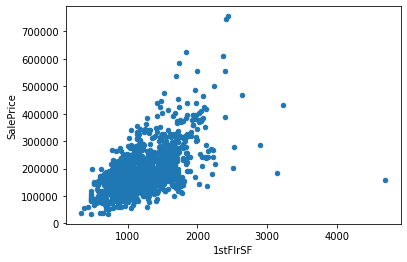

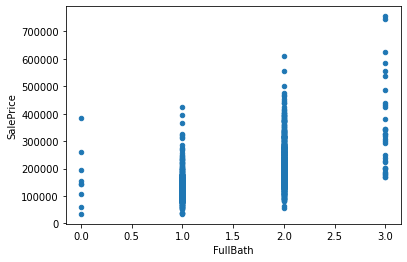

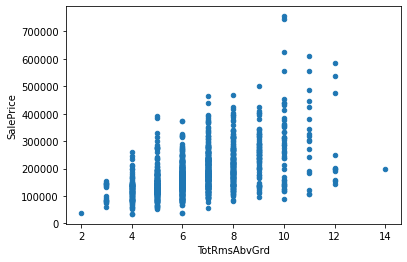

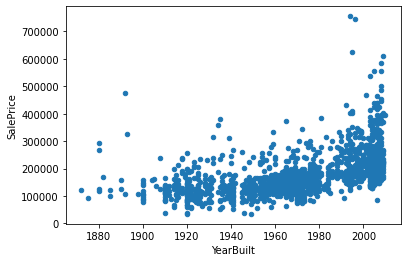

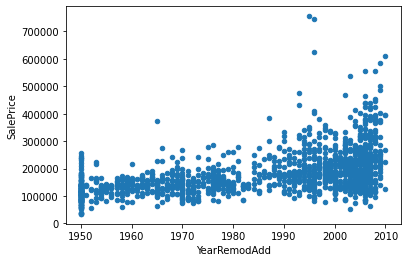

In [34]:
for idx in df_numerical_most_corr.index:
    df.plot(kind='scatter',
          x=idx,
          y='SalePrice')

Ahora tenemos una lista de variables correlacionadas, pero la lista es incompleta pues sabemos que la correlación viene afectada por los outliers. 

No siempre el coeficiente de correlación sirve para ver la relación entre variables, por lo que representarlos puede llevarnos a ver nuevas pistas. 

### Matriz de Correlación (heatmap style)

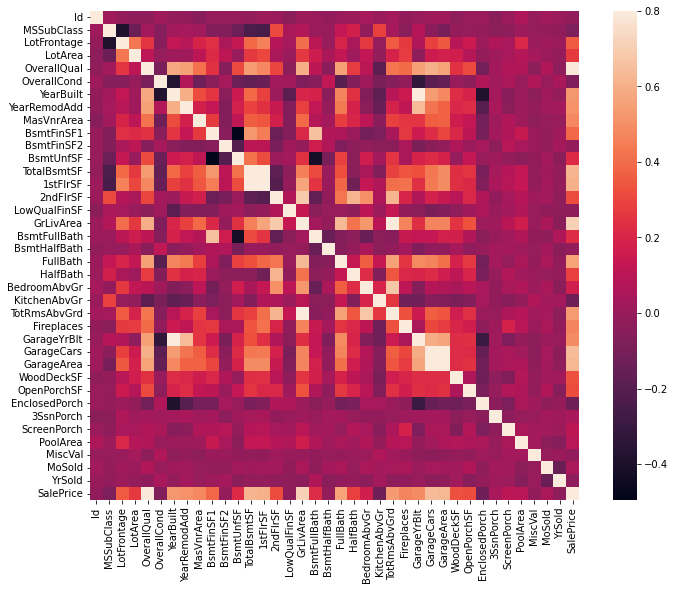

In [35]:
# Correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);


A primera vista, hay dos zonas blancas que llaman mi atención. La primera se refiere a las variables 'TotalBsmtSF' y '1stFlrSF', y la segunda a las variables 'GarageX'. Ambos casos muestran lo fuerte que es la correlación entre estas variables. En realidad, la correlación es tan fuerte que puede indicar una situación de multicolinealidad. Si pensamos en el significado de estas variables, podemos darnos cuenta de que dan casi la misma información. Por lo tanto, es probable que nos encontremos ante una situación de multicolinealidad.

Además, aprovechamos la oportunidad para observar las correlaciones de "Precio de venta". Como podemos ver, 'GrLivArea', 'TotalBsmtSF' y 'OverallQual' muestran una fuerte correlación. Pero no son las únicas. Otras variables muestran una fuerte correlación (por ejemplo, '1stFlrSF') y quizá deberíamos considerarlas también. Comprobémoslo.


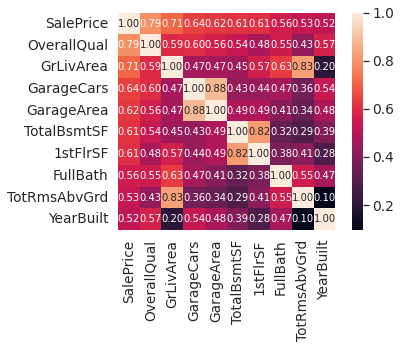

In [36]:
# SalePrice correlation matrix
k = 10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Estas son las variables cuya correlación con "Precio de venta" es más fuerte. 

* OverallQual', 'GrLivArea', y 'TotalBsmtSF' están fuertemente correlacionadas con 'SalePrice'. Compruébelo.

* GarageCars" y "GarageArea" son también algunas de las variables más correlacionadas. Sin embargo, el número de coches que caben en el garaje es una consecuencia de la superficie del garaje. GarageCars' y 'GarageArea' están dando la misma información. Nunca podrás distinguirlos. Por lo tanto, sólo necesitamos una de estas variables en nuestro análisis (podemos mantener 'GarajeCoches' ya que su correlación con 'PrecioVenta' es más fuerte).
TotalBsmtSF" y "1stFloor" también parecen ser hermanos gemelos. Podemos mantener 'TotalBsmtSF' sólo para decir que nuestra primera suposición era correcta 
TotRmsAbvGrd' y 'GrLivArea', otra vez hermanos gemelos.
Parece que "YearBuilt" está ligeramente correlacionado con "SalePrice". 


## Gráficos de dispersión entre "Precio de venta" y variables correlacionadas

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


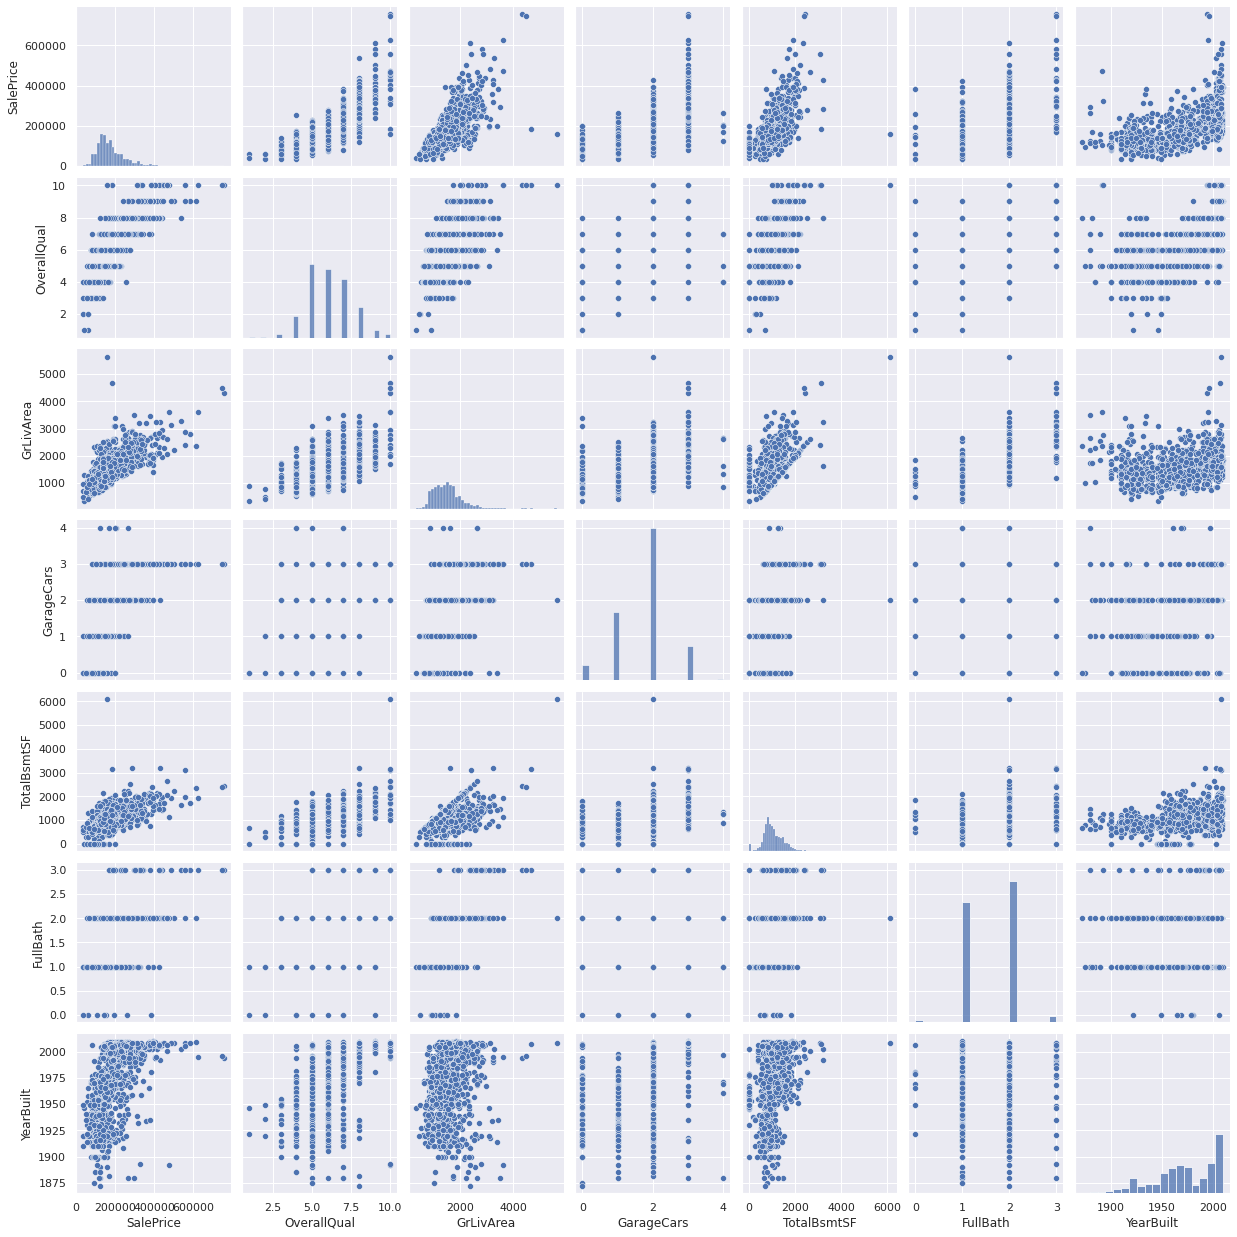

In [37]:
# Plot scatter plots
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[cols], size = 2.5)
plt.show();

## Relación entre Variables Continuas y Categóricas

Podemos usar *Boxplots*

La caja central del *boxplot* representa el 50% central de las observaciones.

Los puntos que estén fuera de la línea podrían ser outliers.

<img src="img/boxplot.gif">

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'WD'),
  Text(1, 0, 'New'),
  Text(2, 0, 'COD'),
  Text(3, 0, 'ConLD'),
  Text(4, 0, 'ConLI'),
  Text(5, 0, 'CWD'),
  Text(6, 0, 'ConLw'),
  Text(7, 0, 'Con'),
  Text(8, 0, 'Oth')])

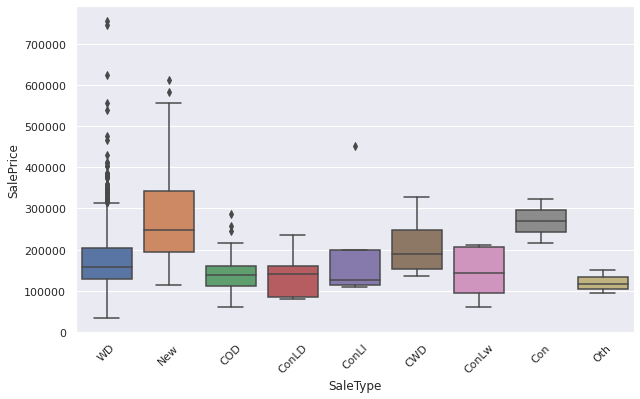

In [38]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='SaleType', y='SalePrice', data=df)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

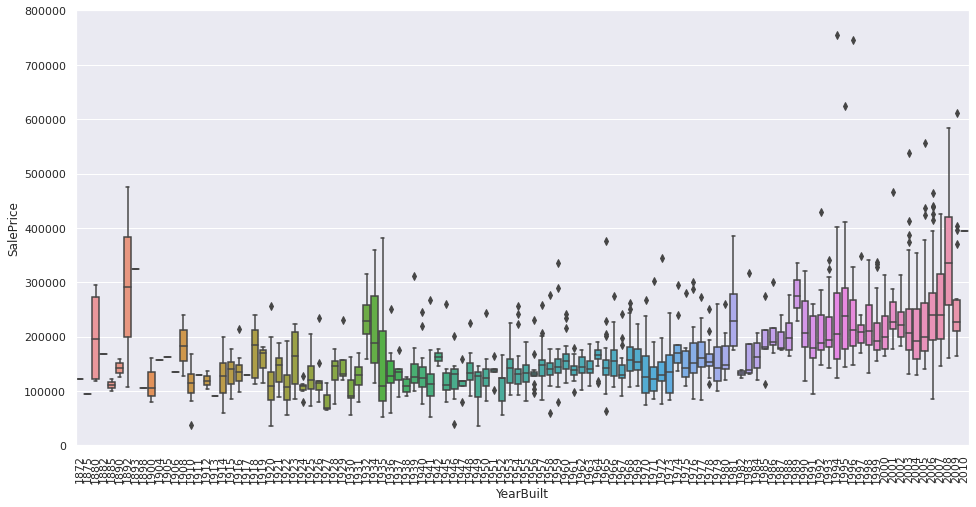

In [39]:
# Box plot YearBuilt/SalePrice
var = 'YearBuilt'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90);

*Aunque no es una tendencia muy marcada, diría que 'SalePrice' es más propenso ser mayor en cosas nuevas que en viejas reliquias.*

<b>Nota</b>: no sabemos si 'SalePrice' está en precios constantes. Los precios constantes intentan eliminar el efecto de la inflación. Si <b>SalePrice</b> no está en precios constantes, debería estarlo, para que los precios sean comparables a lo largo de los años.



## Relación entre Variables Categóricas

*Two-way frequency tables* o tablas de contingencia, son tablas de frecuencia de dos dimensiones donde cada dimensión es una variable distinta. Puede dar información sobre la relación de dos variables. Para crearla, le pasamos dos variables a crosstab en vez de una. Las filas representan las categorías de una variable, y las columnas las categorías de la otra variable. 

*Stacked Column Chart*: este método es una forma más visual de una *two-way table*. 

In [40]:
#two-way table
grouped = df_categorical.groupby(['SaleCondition','KitchenQual'])
grouped.size()

SaleCondition  KitchenQual
Abnorml        Ex               7
               Fa               2
               Gd              29
               TA              63
AdjLand        Fa               1
               TA               3
Alloca         Fa               1
               Gd               1
               TA              10
Family         Fa               1
               Gd               6
               TA              13
Normal         Ex              55
               Fa              34
               Gd             470
               TA             639
Partial        Ex              38
               Gd              80
               TA               7
dtype: int64

In [41]:
my_table2 = pd.crosstab(index=df["SaleCondition"], 
                          columns=df["KitchenQual"])

my_table2

KitchenQual,Ex,Fa,Gd,TA
SaleCondition,,,,
Abnorml,7,2,29,63
AdjLand,0,1,0,3
Alloca,0,1,1,10
Family,0,1,6,13
Normal,55,34,470,639
Partial,38,0,80,7


<Axes: xlabel='SaleCondition'>

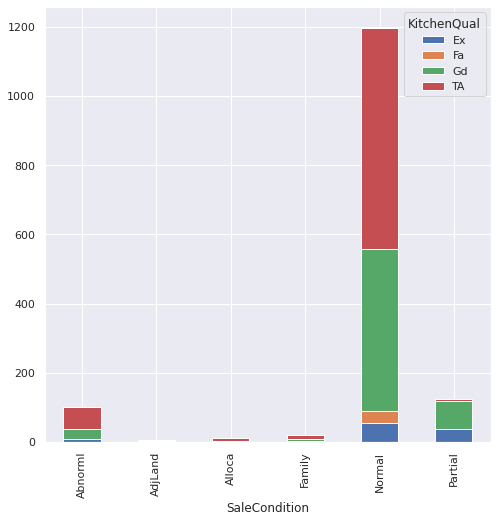

In [42]:
my_table2.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

# Contraste de hipótesis



# Data Quality

## Manejo de datos ausentes

`pandas` toma a los valores `NaN` y `None` como valores ausentes. La función `pandas.isnull` se puede usar para determinar si existen valores ausentes en los datos.

¿Existen valores NaN en la columna price?
Descarta las filas con valores NaN en la columna price.

In [43]:
df['SalePrice'].isnull().any()

False

En caso que quisiesemos llenar dichos valores con uno por defecto, por ejemplo con una cadena vacía, se haría de la siguiente forma:

In [44]:
df.fillna("")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,,Reg,Lvl,AllPub,...,0,,,,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,,Reg,Lvl,AllPub,...,0,,,,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,,IR1,Lvl,AllPub,...,0,,,,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,,IR1,Lvl,AllPub,...,0,,,,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,,IR1,Lvl,AllPub,...,0,,,,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,,Reg,Lvl,AllPub,...,0,,,,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,,Reg,Lvl,AllPub,...,0,,MnPrv,,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,,Reg,Lvl,AllPub,...,0,,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,,Reg,Lvl,AllPub,...,0,,,,0,4,2010,WD,Normal,142125


Si hubiesen y los quisiesemos descartar, lo haríamos de la siguiente forma

In [45]:
df2 = df.dropna(subset=['SalePrice'])

## Outliers

Se pueden observar viendo la distribución de las variables individualmente con un *box plot*, mediante un *scatterplot* o un un diagrama de cajas.

Es importante considerar el efecto que pueden tener en los datos, pues cambian los resultados de tests estadísticos como la desviación estándar, la media, la mediana, y puede tener impacto en los resultados de los modelos estadísticos como regresión, etc.

¿Cómo los tratamos? La decisión dependerá del contexto. Por eso es importante entender los datos e identificar las causas de los outliers. 

- Si el outlier es por error de introducción o procesamiento de datos, podríamos considerar eliminarlos.
- Se pueden transformar asignándole pesos a las observaciones, o usar el logaritmo natural para reducir la variación que produce el outlier en los datos.
- Igual que con los nulos, se pueden usar métodos para reemplazar dichos valores extremos con la mediana, media o moda. 

<Axes: ylabel='Frequency'>

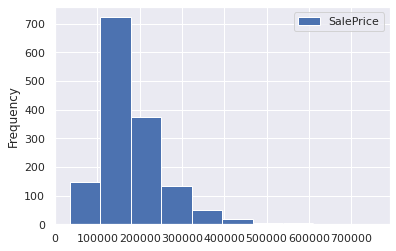

In [46]:
df.plot(kind='hist',
          x='LotFrontage',
          y='SalePrice')

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

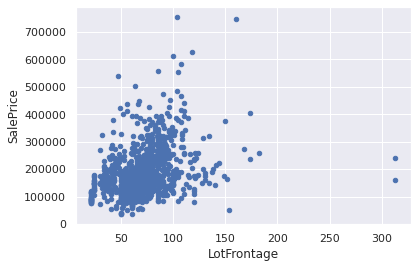

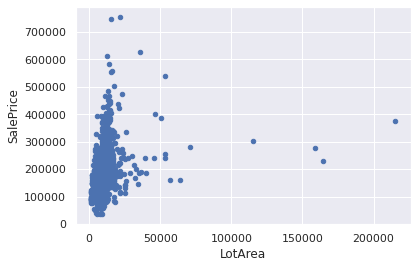

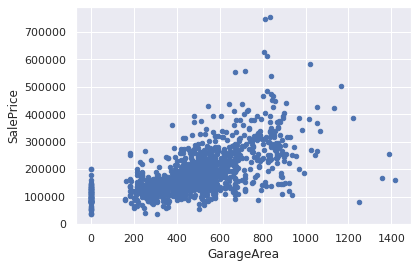

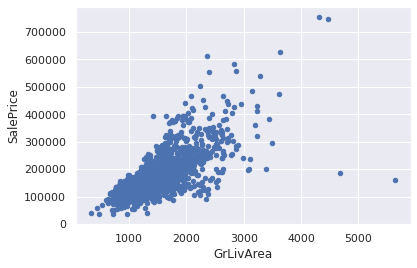

In [47]:
df.plot(kind='scatter',
          x='LotFrontage',
          y='SalePrice')

df.plot(kind='scatter',
          x='LotArea',
          y='SalePrice')

df.plot(kind='scatter',
          x='GarageArea',
          y='SalePrice')

df.plot(kind='scatter',
          x='GrLivArea',
          y='SalePrice')

### Test de Tukey para valores atípicos

Una forma muy sencilla de eliminar outliers de forma analítica es aplicando el test de Tukey. Éste dice que se considera valor atípico a todo aquel que **esté fuera** del siguiente rango:

- Valor atípico: $ Q_1 - 1.5\cdot IQR > x > Q_3 + 1.5 \cdot IQR$
- Valor atípico extremo: $Q_1 - 3\cdot IQR > x >Q_3 + 3\cdot IQR$

Si la distribución es normal, entonces queda de la siguiente forma:

- Valor atípico: $ -\sigma > x > \sigma $
- Valor atípico extremo: $ -2\cdot\sigma > x > 2\cdot\sigma $

In [48]:
def tukey_outliers(df,column,extreme=False):
    q1, q3 = np.percentile(df[column],[25,75])
    iqr = q3 - q1
    constant = 1.5 if not extreme else 3
    return df[~((df[column]>(q3+constant*iqr)) | (df[column]<(q1-constant*iqr)))]


<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

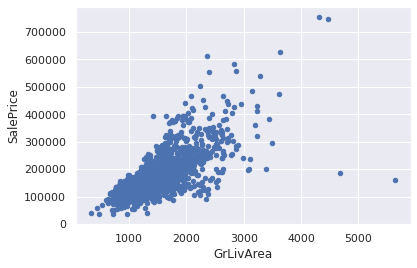

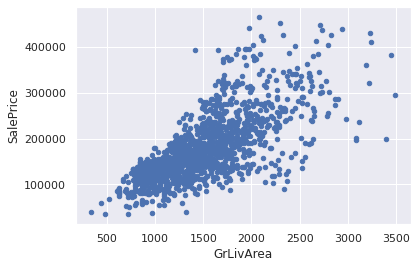

In [49]:
df2 = tukey_outliers(df,'GrLivArea',extreme=True)
df3 = tukey_outliers(df2,'SalePrice',extreme=True)
df.plot(kind='scatter',
          x='GrLivArea',
          y='SalePrice')
df3.plot(kind='scatter',
          x='GrLivArea',
          y='SalePrice')